In [516]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.feature import corner_harris, corner_peaks

plt.rcParams['figure.figsize'] = (10, 8)

In [517]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')

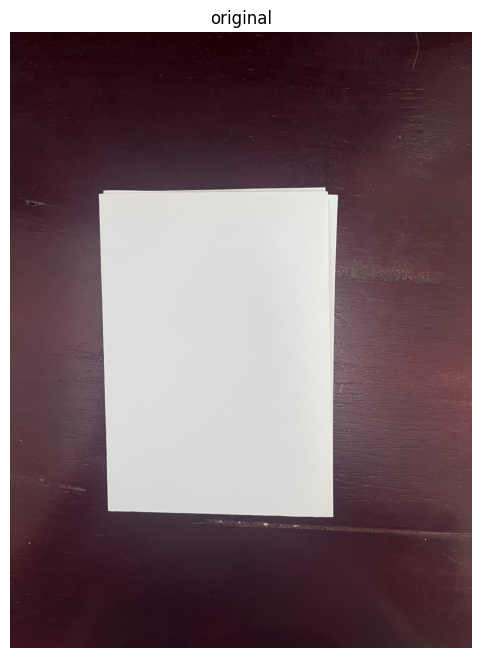

In [518]:
# read image
image = imread("./imgs/img_bt_tt_1.jpg")[:,:,:3]

# show image original
show_image(image=image, title="original")

- Ảnh original cho thấy được tấm giấy màu trắng ở giữa mặt bàn bằng gỗ.
- ta thấy mặt bàn bằng gỗ có những đường rãnh làm tạo những điểm nhiễu cho ảnh.

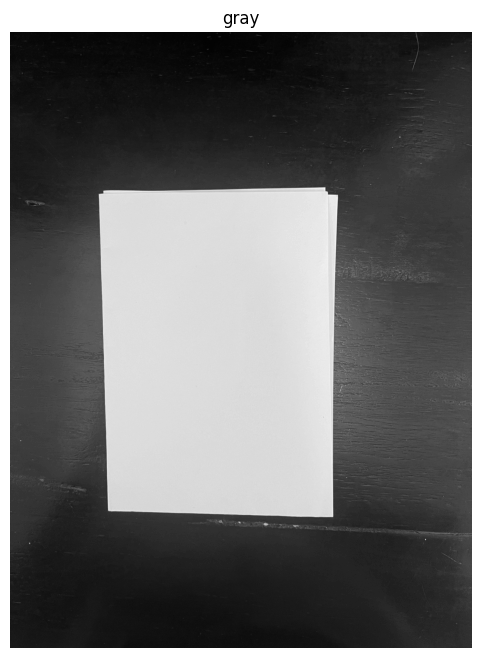

In [519]:
# convert rgb image to gray-scale image
image_gray = rgb2gray(image)

# show image gray
show_image(image=image_gray, title="gray")

- Ảnh gray trên khhi chưa qua bộ lọc gaussian ta thấy ảnh có những rãnh nhiễu hiện rõ trên ảnh. 
- Nó làm cho ảnh khi nhận diện thì góc phát hiện bị sai ở những điểm không được cho là góc.

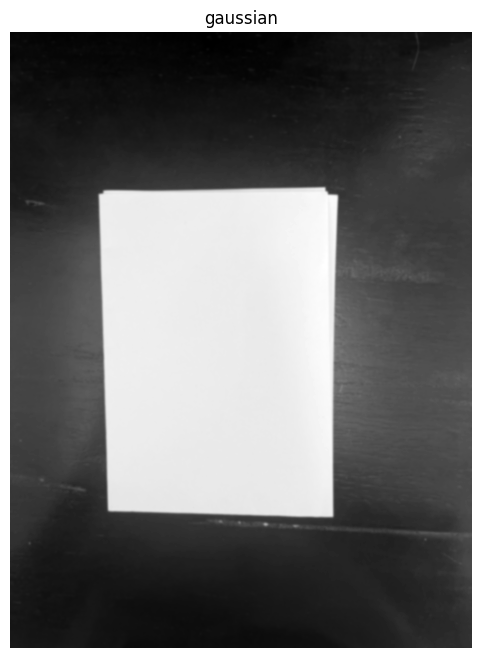

In [520]:
# apply to gaussian blur to image with sigma = 4
image_gaussian = gaussian(image_gray, sigma=4)

# show image gaussian
show_image(image=image_gaussian, title="gaussian")

- Ảnh gauusian trên khi đã qua bộ lọc gaussian với hệ số sigma = 4 ta thấy ảnh bị mờ hơn.
- Ảnh mượt hơn và những đường rãnh được xem là nhiễu đã được giảm.

In [526]:
measure_image_1 = corner_harris(image_gaussian, sigma=1)

[[2046 1068]
 [ 650 1305]
 [2052 1180]
 [2009 1337]]


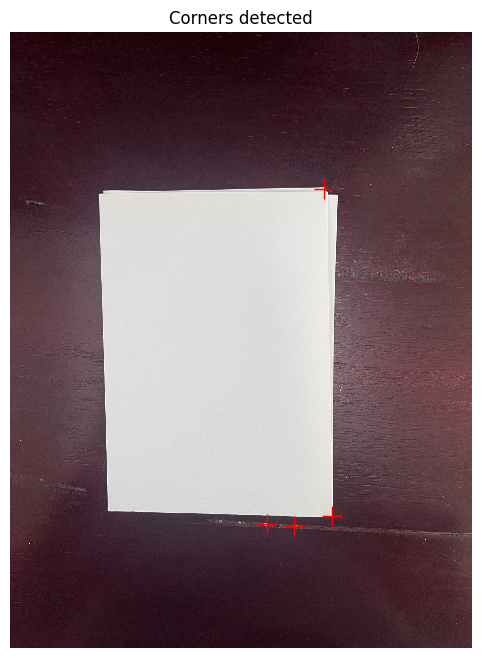

In [527]:
# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image_1,
                      min_distance=10,
                      num_peaks=4)
print(coords)
show_image_with_corners(image, coords)

In [528]:
# Apply the detector to measure the possible corners
measure_image = corner_harris(image_gaussian, sigma=2)
print("0: ", measure_image[0][0], "1: ", measure_image_1[0][0])

0:  8.916753414850124e-06 1:  3.095783419078129e-05


- Tính toán những số có khả năng là góc với thông số sigma = 2 và kết quả khả năng là góc là khoảng 10^-6
- Tính toán những số có khả năng là góc với thông số sigma = 1 và kết quả khả năng là góc là khoảng 10^-5

[[ 648 1307]
 [2012 1339]
 [ 680 1359]
 [ 676  372]]


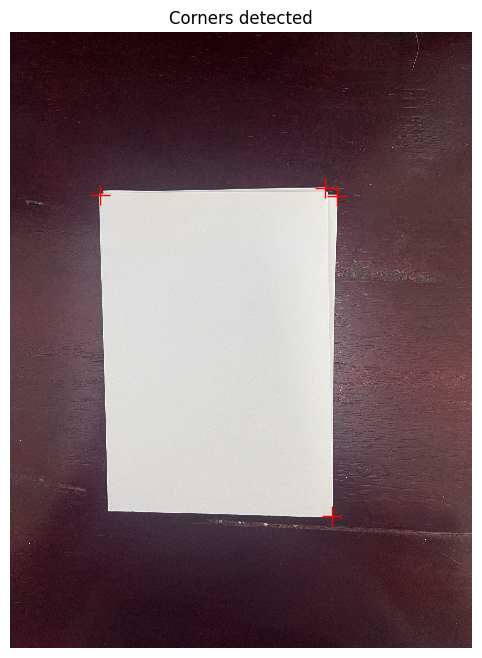

In [529]:
# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image,
                      min_distance=10,
                      num_peaks=4)
print(coords)
show_image_with_corners(image, coords)

[[ 648 1307]
 [2012 1339]
 [ 680 1359]
 [ 676  372]]


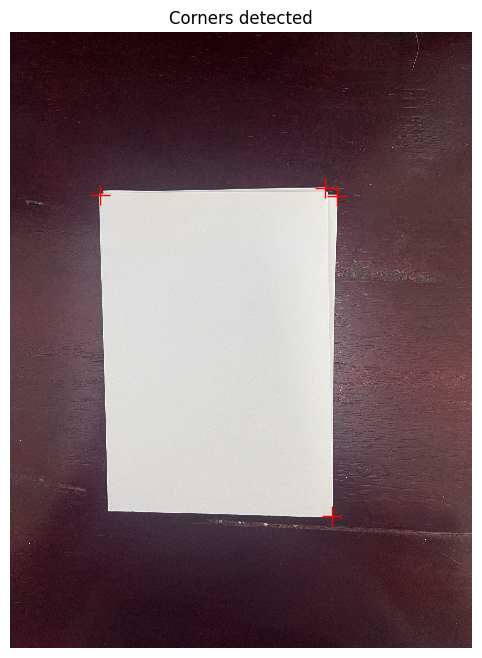

In [523]:
# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image,
                      min_distance=25,
                      num_peaks=4)
print(coords)
show_image_with_corners(image, coords)

[[ 648 1307]
 [2012 1339]
 [ 676  372]
 [1986  411]]


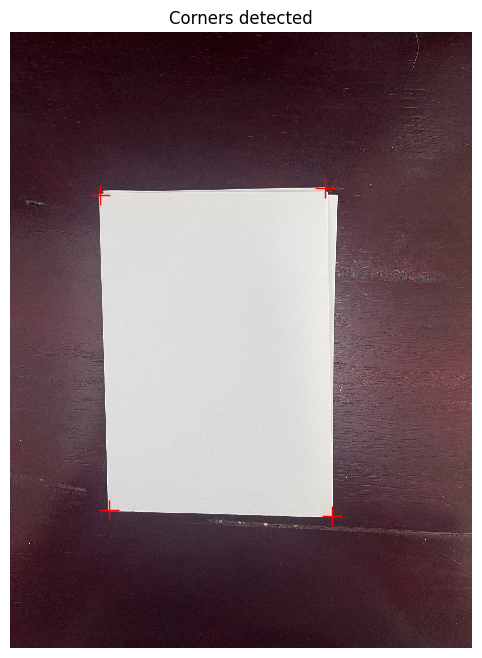

In [524]:
# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image,
                             min_distance=50,
                             num_peaks=4)
print(coords)
show_image_with_corners(image, coords)

- Thông số min_distance là khoảng cách nhỏ nhất của 2 góc cách nhau. 
- nếu chọn giá trị là 10, 25 thì sẽ có những điểm góc gần nhau ở góc trên bên phải.
- nếu chọn giá trị là 50 thì những điểm góc được hiện thị ở 4 góc của tấm giấy.

- Thông số num_peaks là chọn số đỉnh tối đa nhận diện. Chọn 4 vì hình chữ nhật có 4 góc nên chọn là 4.